## Software to plot comparisons between ray-tracing and various geolocation and refractive index determination techniques.

In [1]:
%pylab inline
import pandas as pd
import glob
import os
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
#pd.set_option('display.height', 1000)
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#fl = '/home/w2naf/Desktop/ray_data/bks_b3_f10_20120921_2-14.csv'
df = None
home_dir = os.getenv('HOME')
files = glob.glob(home_dir+'/Desktop/ray_data/*.csv')
for fl in files:
    print 'Loading file {fl}'.format(fl=fl)
    if df is None:
        df = pd.DataFrame.from_csv(fl)
    else:
        df_tmp = pd.DataFrame.from_csv(fl)
        df = df.append(df_tmp, ignore_index=True)

Loading file /home/davitpy/Desktop/ray_data/data.csv


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1399
Data columns (total 32 columns):
beam           1400 non-null int64
elv_init       1400 non-null float64
gran           1400 non-null float64
h              1400 non-null float64
lat            1400 non-null float64
lon            1400 non-null float64
nr             1400 non-null float64
r              1400 non-null float64
radar          1400 non-null object
rel            1400 non-null float64
th             1400 non-null float64
time           1400 non-null object
Loc_time       1400 non-null float64
lgc_rt         1400 non-null float64
height         1400 non-null float64
h_2p           1400 non-null float64
th_2p          1400 non-null float64
lgc_2p         1400 non-null float64
nr_2p          1400 non-null float64
phase          1400 non-null int64
lat_2p         1400 non-null float64
lon_2p         1400 non-null float64
bearing        1400 non-null float64
bx             1400 non-null float64
by         

In [5]:
df.tail(-1000)

,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,th,time,Loc_time,lgc_rt,height,h_2p,th_2p,lgc_2p,nr_2p,phase,lat_2p,lon_2p,bearing,bx,by,bz,B,b_kx,b_kz,dip,lgc_diff_2p,nr_diff_2p
1000,9,10.4,455000,10000,55.623127,-103.413849,0.993975,6466808.5,sas,12.891176,0.069252,2012-09-20 00:00:00,15.105743,441.204582,95.8085,97.635529,0.069239,444.538967,0.998146,3,55.621164,-103.236814,30.622010,9997.408862,1379.040353,48304.121886,49347.118734,0.188576,0.978864,79.095687,-3.334384,-0.004171
1001,9,10.4,945000,10000,59.275848,-99.811073,0.970300,6574906.0,sas,9.712242,0.141498,2012-09-20 00:00:00,15.345928,901.480716,203.9060,236.293798,0.141142,902.633595,0.969702,3,59.103746,-99.150126,34.065420,8147.069603,526.417263,49131.125661,49804.812689,0.141430,0.986473,81.841151,-1.152878,0.000598
1002,9,10.4,955000,10000,59.349274,-99.734749,0.969242,6577410.5,sas,9.383973,0.142951,2012-09-20 00:00:00,15.351017,910.739756,206.4105,239.471472,0.142577,911.773995,0.969116,3,59.171811,-99.060277,34.142547,8112.190104,508.757566,49142.493906,49810.151273,0.140524,0.986596,81.893677,-1.034239,0.000127
1003,9,10.4,965000,10000,59.422676,-99.658295,0.968209,6579860.5,sas,9.050213,0.144404,2012-09-20 00:00:00,15.356114,919.995663,208.8605,242.662739,0.144010,920.905594,0.968529,3,59.239748,-98.970157,34.219961,8077.441551,491.094419,49153.657101,49815.341433,0.139621,0.986717,81.946061,-0.909931,-0.000320
1004,9,10.4,975000,10000,59.496059,-99.581703,0.967207,6582168.0,sas,8.708067,0.145856,2012-09-20 00:00:00,15.361220,929.248532,211.1680,245.867580,0.145442,930.028365,0.967943,3,59.307557,-98.879765,34.297663,8042.824763,473.428224,49164.616239,49820.383924,0.138721,0.986837,81.998302,-0.779833,-0.000736
1005,9,10.4,985000,10000,59.569416,-99.504967,0.966236,6584229.0,sas,8.363338,0.147308,2012-09-20 00:00:00,15.366336,938.498457,213.2290,249.085976,0.146873,939.142285,0.967356,3,59.375237,-98.789101,34.375655,8008.340548,455.759380,49175.372319,49825.279504,0.137822,0.986956,82.050401,-0.643827,-0.001120
1006,9,10.4,995000,10000,59.642731,-99.428093,0.965303,6585976.5,sas,8.013128,0.148759,2012-09-20 00:00:00,15.371460,947.745820,214.9765,252.317905,0.148302,948.247329,0.966769,3,59.442789,-98.698163,34.453936,7973.989706,438.088289,49185.926347,49830.028936,0.136926,0.987074,82.102358,-0.501509,-0.001466
1007,9,10.3,455000,10000,55.624687,-103.412445,0.994395,6466134.0,sas,12.902931,0.069282,2012-09-20 00:00:00,15.105837,441.396731,95.1340,96.866071,0.069270,444.732403,0.998574,3,55.622661,-103.235244,30.623306,9996.594405,1378.696113,48304.580053,49347.392603,0.188555,0.978868,79.096891,-3.335672,-0.004178
1008,9,10.3,945000,10000,59.279545,-99.807304,0.971011,6573642.0,sas,9.822705,0.141571,2012-09-20 00:00:00,15.346180,901.948653,202.6420,234.729138,0.141221,903.136677,0.970227,3,59.107494,-99.145190,34.069656,8145.147336,525.445821,49131.756426,49805.110259,0.141380,0.986480,81.844044,-1.188025,0.000783
1009,9,10.3,955000,10000,59.353016,-99.730934,0.969952,6576135.5,sas,9.500138,0.143025,2012-09-20 00:00:00,15.351271,911.212819,205.1355,237.891013,0.142657,912.284345,0.969643,3,59.175610,-99.055250,34.146864,8110.245490,507.770939,49143.122912,49810.445118,0.140474,0.986603,81.896607,-1.071526,0.000309


In [6]:
df['lgc_diff_2p'].describe()

count    1.400000e+03
mean    -6.480150e-14
std      2.616960e+00
min     -7.308711e+00
25%     -1.119878e+00
50%     -6.588980e-01
75%      7.419974e-01
max      7.158079e+00
Name: lgc_diff_2p, dtype: float64

In [7]:
df['nr_diff_2p'].describe()

count    1.400000e+03
mean    -5.963484e-17
std      3.618951e-03
min     -9.260406e-03
25%     -1.283426e-03
50%      1.094775e-04
75%      1.849456e-03
max      1.258114e-02
Name: nr_diff_2p, dtype: float64

In [8]:
df['h_2p'].describe()

count    1400.000000
mean      278.098197
std        94.732685
min        89.129757
25%       244.087386
50%       267.214245
75%       346.034566
max       422.594554
Name: h_2p, dtype: float64

In [9]:
bins = np.arange(-205, 205,10)

In [10]:
bins

array([-205, -195, -185, -175, -165, -155, -145, -135, -125, -115, -105,
        -95,  -85,  -75,  -65,  -55,  -45,  -35,  -25,  -15,   -5,    5,
         15,   25,   35,   45,   55,   65,   75,   85,   95,  105,  115,
        125,  135,  145,  155,  165,  175,  185,  195])

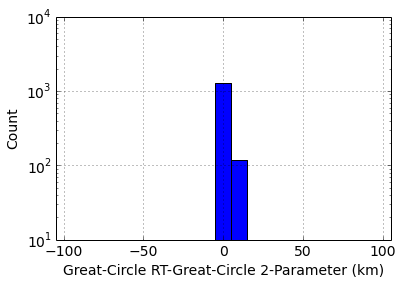

In [11]:
df['lgc_diff_2p'].hist(bins=bins, log=True)
rcParams.update({'font.size':14})
plt.xlim(-105, 105)
plt.ylim(10,10000)
plt.xlabel('Great-Circle RT-Great-Circle 2-Parameter (km)')
plt.ylabel('Count')

In [12]:
#df['lgc_diff_sm'].hist(bins=bins, log=True)
#plt.xlim(-205, 205)
#plt.xlabel('Great-Circle RT-Great-Circle SM (km)')
#plt.ylabel('Count')

In [13]:
#plt.xlim(-205, 205)
#plt.xlabel('Great-Circle RT-Great-Circle CM (km)')
#plt.ylabel('Count')

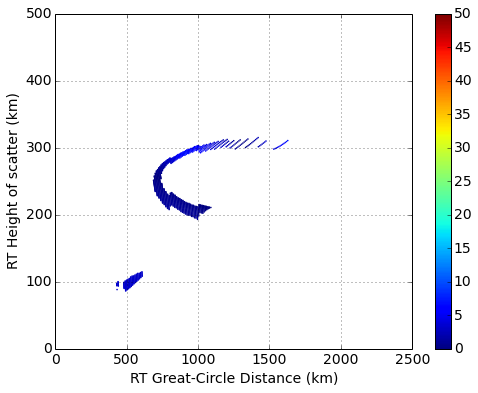

In [14]:
xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['lgc_diff_2p'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0, vmax=50) 
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Height of scatter (km)')
ax.grid()

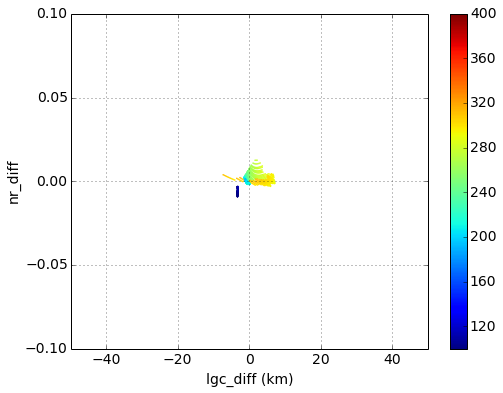

In [15]:
xvar = df['lgc_diff_2p']
yvar = df['nr_diff_2p']
color = df['height']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=100, vmax=400) 
plt.colorbar(scat)
ax.set_xlabel ('lgc_diff (km)')
ax.set_xlim(-50, 50)
ax.set_ylim(-.10, .10)
ax.set_ylabel ('nr_diff')
ax.grid()

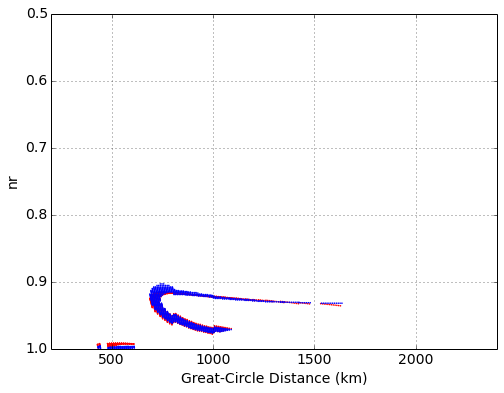

In [16]:
xvar = df['lgc_rt']
xvar1 = df['lgc_2p']
yvar = df['nr']
yvar1 = df['nr_2p']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c='red', s=10, marker='.', edgecolor='none', label='lgc_rt')
scat = ax.scatter(xvar1, yvar1, c='blue', s=10, marker='.', edgecolor='none',label='lgc_2p') 
#plt.colorbar(scat)
ax.set_xlabel ('Great-Circle Distance (km)')
ax.set_xlim(200, 2400)
ax.set_ylim(1, 0.5)
ax.set_ylabel ('nr')
ax.grid()

/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


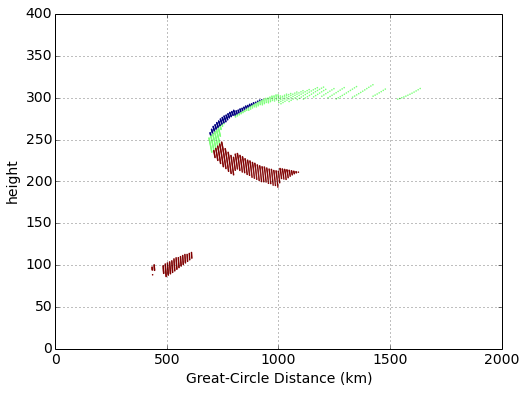

In [17]:
xvar = df['lgc_2p']
yvar = df['height']
color = df['phase']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c= color, s=10, marker='.', edgecolor='none', vmin=1, vmax=3)
#plt.colorbar(scat)
ax.set_xlabel ('Great-Circle Distance (km)')
ax.set_xlim(0, 2000)
ax.set_ylim(0, 400)
ax.set_ylabel ('height')
ax.grid()
ax.legend(loc='upper right')
#Blue dots represent Phase 1 rays: penetrating rays that have have one scatter region.
#Green dots represent Phase 2 rays: penetrating rays that can backscatter in the 
            #bottomside and topside of the ionosphere.
#Red dots represent Phase 3 rays: reflected rays that can backscatter in the bottomside
            #E-layer and F-layer before being reflected by the ionosphere. These are
            #the only rays capable of 1 1/2 hop backscatter.

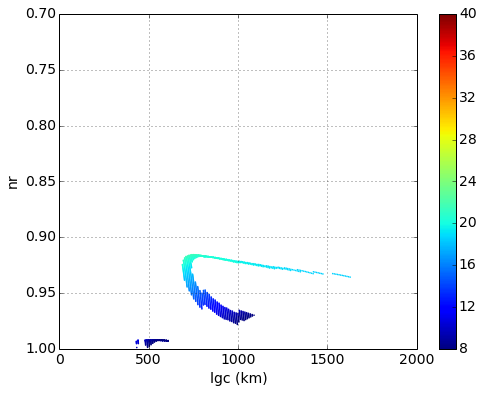

In [18]:
xvar = df['lgc_rt']
yvar = df['nr']
color = df['elv_init']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=8, vmax=40) 
plt.colorbar(scat)
ax.set_xlabel ('lgc (km)')
ax.set_xlim(0, 2000)
ax.set_ylim(1.0, 0.7)
ax.set_ylabel ('nr')
ax.grid()

In [19]:
df['lgc_diff_2p'].describe()

count    1.400000e+03
mean    -6.480150e-14
std      2.616960e+00
min     -7.308711e+00
25%     -1.119878e+00
50%     -6.588980e-01
75%      7.419974e-01
max      7.158079e+00
Name: lgc_diff_2p, dtype: float64

In [20]:
df['nr_diff_2p'].describe()

count    1.400000e+03
mean    -5.963484e-17
std      3.618951e-03
min     -9.260406e-03
25%     -1.283426e-03
50%      1.094775e-04
75%      1.849456e-03
max      1.258114e-02
Name: nr_diff_2p, dtype: float64

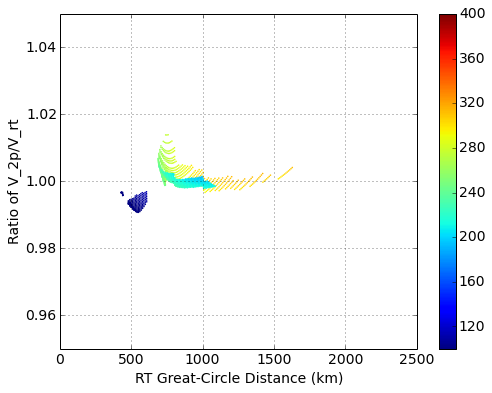

In [21]:
xvar = df['lgc_rt']
yvar = df['nr']/df['nr_2p']
color = df['height']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=100, vmax=400) 
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0.95, 1.05)
ax.set_ylabel('Ratio of V_2p/V_rt')
ax.grid()

In [22]:
#xvar = df['lgc_rt']
#yvar = df['height']
#color = np.abs(df['lgc_diff_sm'])
#fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
#scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0, vmax=100) 
#plt.colorbar(scat)
#ax.set_xlabel ('RT Great-Circle Distance (km)')
#ax.set_xlim(0, 2500)
#ax.set_ylim(0, 500)
#ax.set_ylabel ('RT Height of scatter (km)')
#ax.grid()

In [23]:
#xvar = df['lgc_rt']
#yvar = df['height']
#color = np.abs(df['lgc_diff_cm'])
#fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
#scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0, vmax=100) 
#plt.colorbar(scat)
#ax.set_xlabel ('RT Great-Circle Distance (km)')
#ax.set_xlim(0, 2500)
#ax.set_ylim(0, 500)
#ax.set_ylabel ('RT Height of scatter (km)')
#ax.grid()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1399
Data columns (total 32 columns):
beam           1400 non-null int64
elv_init       1400 non-null float64
gran           1400 non-null float64
h              1400 non-null float64
lat            1400 non-null float64
lon            1400 non-null float64
nr             1400 non-null float64
r              1400 non-null float64
radar          1400 non-null object
rel            1400 non-null float64
th             1400 non-null float64
time           1400 non-null object
Loc_time       1400 non-null float64
lgc_rt         1400 non-null float64
height         1400 non-null float64
h_2p           1400 non-null float64
th_2p          1400 non-null float64
lgc_2p         1400 non-null float64
nr_2p          1400 non-null float64
phase          1400 non-null int64
lat_2p         1400 non-null float64
lon_2p         1400 non-null float64
bearing        1400 non-null float64
bx             1400 non-null float64
by         

In [25]:
bins_nr = np.arange(-.055, .095, .01)

In [26]:
bins_nr

array([-0.055, -0.045, -0.035, -0.025, -0.015, -0.005,  0.005,  0.015,
        0.025,  0.035,  0.045,  0.055,  0.065,  0.075,  0.085])

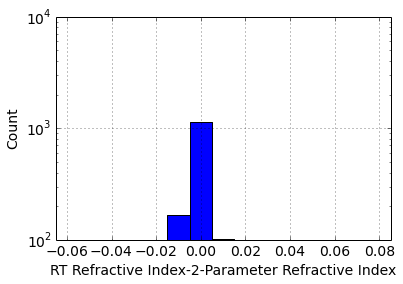

In [27]:
df['nr_diff_2p'].hist(bins=bins_nr, log=True)
plt.xlim(-.065, .085)
plt.xlabel('RT Refractive Index-2-Parameter Refractive Index')
plt.ylabel('Count')

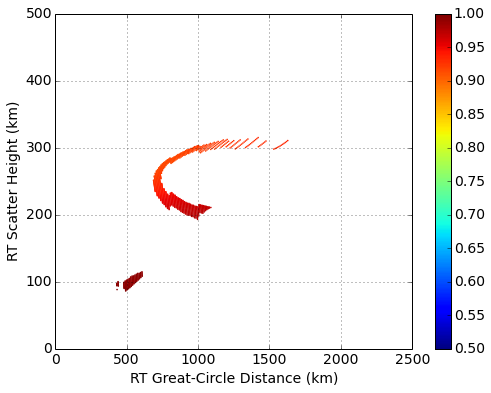

In [28]:
xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['nr'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0.5, vmax=1.0)
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Scatter Height (km)')
ax.grid()

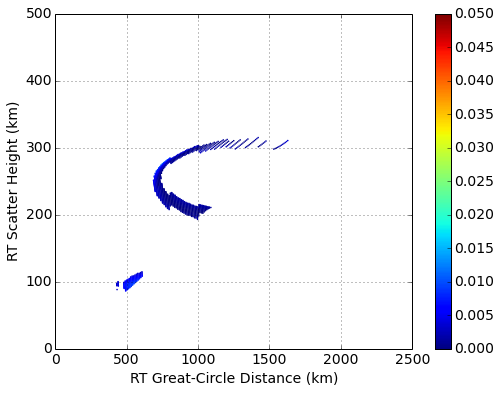

In [29]:
xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['nr_diff_2p'])  #was 'nr'
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin= 0., vmax=0.05) #was 0.5,1.0
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Scatter Height (km)')
ax.grid()